In [1]:
from faker import Faker
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/nepali_first_name_gender.csv')

In [3]:
filename = '../datasets/lastnames.txt'
with open(filename) as f:
    content = f.readlines()
content = [x.strip()[:-1] for x in content] 

In [4]:
last_names = [x.capitalize() for x in content] 

In [5]:
first_name_male = [x.capitalize() for x in list(df[df.gender=='M'].first_name)] 
first_name_female = [x.capitalize() for x in list(df[df.gender=='F'].first_name)]

In [6]:
[random.choice(first_name_male) + " " + random.choice(last_names) for x in range(10)]

['Nirmal Pradhaan',
 'Chhiring Buddacharya',
 'Peter Rasaili',
 'Dipesh Magar',
 'Pralhad Narakmi',
 'Finjo Kahtakho',
 'Kaushal Jayana',
 'Chhiring Bagchand',
 'Bikash Jamakatel',
 'Susshanzt Bhugel']

In [7]:
total_customer = 200000
male_percent = 58

male = {'Name': [random.choice(first_name_male) + " " + random.choice(last_names) for x in range(int(total_customer*male_percent/100))]}
female = {'Name': [random.choice(first_name_female) + " " + random.choice(last_names) for x in range(int(total_customer*(100-male_percent)/100))]}

In [8]:
df_male = pd.DataFrame(data=male)
df_male['Gender'] = 'Male'
df_female = pd.DataFrame(data=female)
df_female['Gender'] = 'Female'

In [9]:
df = df_male.append(df_female)

In [10]:
df.loc[df.sample(frac=.04).index,
    'Gender'
] = 'Other'

df.loc[df.sample(frac=.02).index,
    'Gender'
] = 'Prefer not to say'

In [11]:
df.Gender.value_counts()

Male                 104464
Female                74372
Other                 13884
Prefer not to say      7280
Name: Gender, dtype: int64

In [12]:
def email_gen(name):
    name = name.lower()
    return (name.split(' ')[0]+'.'+name.split(' ')[1]+'@fakeemail.com')

In [13]:
df['Email'] = df.Name.apply(email_gen)

In [14]:
df

,Name,Gender,Email
0,Krishh Chouhan,Male,krishh.chouhan@fakeemail.com
1,Samir Balmapaki,Male,samir.balmapaki@fakeemail.com
2,Sajit Taparia,Male,sajit.taparia@fakeemail.com
3,Sabal Maheshary,Male,sabal.maheshary@fakeemail.com
4,Bejyo Lingthep,Male,bejyo.lingthep@fakeemail.com
...,...,...,...
83995,Samixya Timilasina,Female,samixya.timilasina@fakeemail.com
83996,Reeya Gadtaula,Female,reeya.gadtaula@fakeemail.com
83997,Shubhu Buthathoki,Female,shubhu.buthathoki@fakeemail.com
83998,Santoshi Lawot,Female,santoshi.lawot@fakeemail.com


In [15]:
df['Phone'] = [random.randint(9841000000, 9842000000) for x in range(df.shape[0])]

In [16]:
df

,Name,Gender,Email,Phone
0,Krishh Chouhan,Male,krishh.chouhan@fakeemail.com,9841665504
1,Samir Balmapaki,Male,samir.balmapaki@fakeemail.com,9841799015
2,Sajit Taparia,Male,sajit.taparia@fakeemail.com,9841677552
3,Sabal Maheshary,Male,sabal.maheshary@fakeemail.com,9841890108
4,Bejyo Lingthep,Male,bejyo.lingthep@fakeemail.com,9841682797
...,...,...,...,...
83995,Samixya Timilasina,Female,samixya.timilasina@fakeemail.com,9841036978
83996,Reeya Gadtaula,Female,reeya.gadtaula@fakeemail.com,9841830701
83997,Shubhu Buthathoki,Female,shubhu.buthathoki@fakeemail.com,9841239773
83998,Santoshi Lawot,Female,santoshi.lawot@fakeemail.com,9841543245


In [17]:
df['Channel'] = 'Word of Mouth'

In [18]:
df.loc[df.sample(frac=.5).index,
    'Channel'
] = 'Facebook/Ads'

df.loc[df.sample(frac=.2).index,
    'Channel'
] = 'Google Search'

df.loc[df.sample(frac=.1).index,
    'Channel'
] = 'Other'

In [19]:
df

,Name,Gender,Email,Phone,Channel
0,Krishh Chouhan,Male,krishh.chouhan@fakeemail.com,9841665504,Word of Mouth
1,Samir Balmapaki,Male,samir.balmapaki@fakeemail.com,9841799015,Google Search
2,Sajit Taparia,Male,sajit.taparia@fakeemail.com,9841677552,Google Search
3,Sabal Maheshary,Male,sabal.maheshary@fakeemail.com,9841890108,Other
4,Bejyo Lingthep,Male,bejyo.lingthep@fakeemail.com,9841682797,Google Search
...,...,...,...,...,...
83995,Samixya Timilasina,Female,samixya.timilasina@fakeemail.com,9841036978,Facebook/Ads
83996,Reeya Gadtaula,Female,reeya.gadtaula@fakeemail.com,9841830701,Google Search
83997,Shubhu Buthathoki,Female,shubhu.buthathoki@fakeemail.com,9841239773,Other
83998,Santoshi Lawot,Female,santoshi.lawot@fakeemail.com,9841543245,Facebook/Ads


In [20]:
df.Channel.value_counts()

Facebook/Ads     76700
Google Search    54684
Other            35041
Word of Mouth    33575
Name: Channel, dtype: int64

In [21]:
df['First Contact'] = 'app'

In [22]:
df.loc[df.sample(frac=.676).index,
    'First Contact'
] = 'browser'

In [23]:
df

,Name,Gender,Email,Phone,Channel,First Contact
0,Krishh Chouhan,Male,krishh.chouhan@fakeemail.com,9841665504,Word of Mouth,browser
1,Samir Balmapaki,Male,samir.balmapaki@fakeemail.com,9841799015,Google Search,browser
2,Sajit Taparia,Male,sajit.taparia@fakeemail.com,9841677552,Google Search,browser
3,Sabal Maheshary,Male,sabal.maheshary@fakeemail.com,9841890108,Other,browser
4,Bejyo Lingthep,Male,bejyo.lingthep@fakeemail.com,9841682797,Google Search,browser
...,...,...,...,...,...,...
83995,Samixya Timilasina,Female,samixya.timilasina@fakeemail.com,9841036978,Facebook/Ads,browser
83996,Reeya Gadtaula,Female,reeya.gadtaula@fakeemail.com,9841830701,Google Search,browser
83997,Shubhu Buthathoki,Female,shubhu.buthathoki@fakeemail.com,9841239773,Other,browser
83998,Santoshi Lawot,Female,santoshi.lawot@fakeemail.com,9841543245,Facebook/Ads,browser


In [24]:
df['First Contact'].value_counts()

browser    172086
app         27914
Name: First Contact, dtype: int64

In [25]:
df = df.sample(frac=1)

In [26]:
df

,Name,Gender,Email,Phone,Channel,First Contact
25586,Reshma Munankami,Female,reshma.munankami@fakeemail.com,9841331512,Other,browser
45073,Ansu Vattarai,Female,ansu.vattarai@fakeemail.com,9841450867,Facebook/Ads,browser
7836,Sneha Gajurel,Female,sneha.gajurel@fakeemail.com,9841633496,Google Search,browser
83038,Alina Timla,Female,alina.timla@fakeemail.com,9841108375,Word of Mouth,browser
91983,Chandra Gahire,Male,chandra.gahire@fakeemail.com,9841446915,Word of Mouth,browser
...,...,...,...,...,...,...
74733,Vivi Jajodiya,Female,vivi.jajodiya@fakeemail.com,9841323392,Facebook/Ads,browser
35373,Santoshi Pant,Female,santoshi.pant@fakeemail.com,9841031196,Other,browser
70385,Riyane Humagin,Female,riyane.humagin@fakeemail.com,9841945358,Word of Mouth,browser
83153,Nischal Darji,Male,nischal.darji@fakeemail.com,9841016930,Other,browser


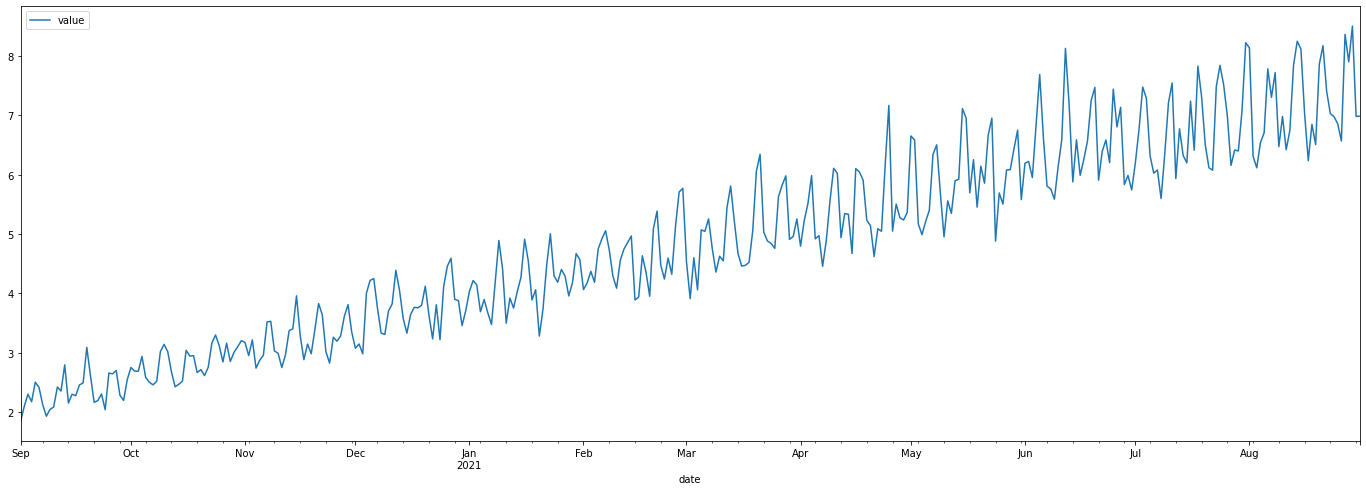

In [27]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor
import pandas as pd

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=5.0, offset=1., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.1, 5: 1.2, 6: 1.2}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

# weekday_factor.plot(start_date=start, end_date=end)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [28]:
data = g.generate()

In [29]:
data['rows'] = (100*data.value).astype(int)

In [30]:
data.rows.sum()

175515

In [31]:
data

,date,base_amount,weekend_boost_factor,white_noise,my_linear_trend,total_factor,value,rows
0,2020-09-01,1.0,1.0,1.040543,2.000000,2.081086,2.081086,208
1,2020-09-02,1.0,1.0,0.935160,2.013699,1.883130,1.883130,188
2,2020-09-03,1.0,1.0,1.120986,2.027397,2.272685,2.272685,227
3,2020-09-04,1.0,1.1,0.949017,2.041096,2.130738,2.130738,213
4,2020-09-05,1.0,1.2,0.948437,2.054795,2.338612,2.338612,233
...,...,...,...,...,...,...,...,...
360,2021-08-27,1.0,1.1,0.936749,6.931507,7.142390,7.142390,714
361,2021-08-28,1.0,1.2,0.986531,6.945205,8.221993,8.221993,822
362,2021-08-29,1.0,1.2,0.948327,6.958904,7.919182,7.919182,791
363,2021-08-30,1.0,1.0,0.959331,6.972603,6.689033,6.689033,668


In [32]:
# ["2020-09-01"]*100 + ["2020-09-02"] * 200
from datetime import datetime as dt
import datetime

def create_list(row):
    return [str(row.date)]*row.rows

In [33]:
final_dates = (data.apply(create_list, axis=1).sum())

In [34]:
clients = df.head(len(final_dates))
clients.reset_index(inplace = True, drop=True)

In [35]:
clients['Created At'] = final_dates

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_92252/3226454060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['Created At'] = final_dates


In [36]:
clients

,Name,Gender,Email,Phone,Channel,First Contact,Created At
0,Reshma Munankami,Female,reshma.munankami@fakeemail.com,9841331512,Other,browser,2020-09-01 00:00:00
1,Ansu Vattarai,Female,ansu.vattarai@fakeemail.com,9841450867,Facebook/Ads,browser,2020-09-01 00:00:00
2,Sneha Gajurel,Female,sneha.gajurel@fakeemail.com,9841633496,Google Search,browser,2020-09-01 00:00:00
3,Alina Timla,Female,alina.timla@fakeemail.com,9841108375,Word of Mouth,browser,2020-09-01 00:00:00
4,Chandra Gahire,Male,chandra.gahire@fakeemail.com,9841446915,Word of Mouth,browser,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
175510,Yahnaa Siddhi,Female,yahnaa.siddhi@fakeemail.com,9841557325,Word of Mouth,browser,2021-08-31 00:00:00
175511,Sajit Jamakrattel,Male,sajit.jamakrattel@fakeemail.com,9841191704,Facebook/Ads,app,2021-08-31 00:00:00
175512,Yashoda Sedhai,Other,yashoda.sedhai@fakeemail.com,9841268244,Facebook/Ads,browser,2021-08-31 00:00:00
175513,Rabindra Dhungel,Male,rabindra.dhungel@fakeemail.com,9841519356,Facebook/Ads,app,2021-08-31 00:00:00


In [37]:
clients.Gender.value_counts()

Male                 91749
Female               65223
Other                12168
Prefer not to say     6375
Name: Gender, dtype: int64

In [38]:
clients.Channel.value_counts()

Facebook/Ads     67396
Google Search    47913
Other            30764
Word of Mouth    29442
Name: Channel, dtype: int64

In [39]:
clients['First Contact'].value_counts()

browser    151013
app         24502
Name: First Contact, dtype: int64

In [40]:
def random_times(input_time):
    random_hour = random.uniform(0, 23)
    return dt.strptime(input_time, "%Y-%m-%d %H:%M:%S") + datetime.timedelta(hours=random_hour)

In [41]:
clients['Created At'] = clients['Created At'].apply(random_times)

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_92252/2194111193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['Created At'] = clients['Created At'].apply(random_times)


In [42]:
clients['Client ID'] = clients.index + 100000000

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_92252/736601839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['Client ID'] = clients.index + 100000000


In [43]:
list(clients)

['Name',
 'Gender',
 'Email',
 'Phone',
 'Channel',
 'First Contact',
 'Created At',
 'Client ID']

In [44]:
clients[['Client ID',
 'Name',
 'Gender',
 'Email',
 'Phone',
 'Channel',
 'First Contact',
 'Created At']
].to_csv('../datasets/clients.csv', index=False)